## FINAL PROJECT.

### Client: AtliQ Hardware.

### AtliQ Hardware is one of the leading computer hardware producers in India, and has even expanded into other countries as well. They sell different types of hardware to big players such as Amazon, Best Buy, and Walmart.<br>
### This year, they're asking PWC to conduct a big audit of their sales and help them automate their existing data.

***

### FINNANCIAL ANALYSIS

#### DECOMPOSITION AND RESEARCH TASKS:

### 1. Definition of Objectives and Key Questions

#### Objective: Understand how revenue, profits, and margins have changed over time. Analyze shifts in the market and identify the most profitable categories.<br>
#### Key Questions:<br>
- How have revenue and profits trended over the years?<br>
- What are the profit margins, and how have they evolved?<br>
- Which markets, platforms, or channels have driven the most revenue and profit?<br>
- What categories of products are the most profitable?<br>
- How have different regions/subzones contributed to revenue and profit?<br>
- Are there any noticeable shifts in market trends or customer preferences?

***

### 2. Identify the Important Metrics

#### Revenue Metrics:<br>
- Total Revenue: The total income generated from sales before any expenses are subtracted.
- Total Sales Volume: The total number of units sold.
#### Profit Metrics:
- Total Gross Profit: The total profit the company makes after subtracting the cost of goods sold (COGS) from revenue.
- Customer Lifetime Value: The total gross profit expected from a customer over the entire duration of their relationship with the company.
- Discounts Customer: The total discounts provided to each customer. Useful for evaluating the impact of discounts on profitability.
- Profit Margin:  To assess the profitability of the company as a whole, a specific product line, or a business unit. It gives a direct understanding of overall profitability.<br>
#### Market and Category Metrics:
- Revenue, Profit, Sales Volume, Costs per Unit by Market, Platform and Channel.
- Revenue by Customer: Revenue broken down by customer.
- Profit by Customer: Profitability by customer.
- Total Sales Volume per Customer: The total number of units sold to each customer.
- Gross Profit per Customer: The total gross profit generated by each customer (revenue minus the cost of goods sold).
- Costs per Unit: The average manufacturing cost per unit of product.
- Revenue per Customer: The total revenue generated from each customer.
- Frequency Purchase by Customer: The number of times a customer makes a purchase within a specific period.
- Churn Customer Segment: The rate at which customers stop doing business over a period of time.
- Market Segment Contribution: The contribution of each customer to different market segments.
#### Trend Metrics:<br>
- Market Share: Proportion of total revenue by market.
- Revenue/Profit by Year: Trend of revenue and profit over time (fiscal_year).

***

### 3. Data Preparation and Cleaning

#### Data Integrity Check:<br>
- Ensure each market belongs to one sub_zone and region.
- Validate that each customer has only one associated platform.
- Check that product_code is consistent across all fact tables.
- Verify that there are only 3 unique values in the division column of the dim_product table.
#### Handle Missing Data:<br>
- Identify and address missing values in key columns like gross_price, manufacturing_cost, and sold_quantity.
- Impute or remove records with missing data as appropriate.
#### Feature Engineering:<br>
- Create new features for further analysis.
- Aggregate data by fiscal_year, market, platform, etc., to facilitate trend analysis.

In [93]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

In [94]:
con = sqlite3.connect('/Users/cesarchaparro/Desktop/TripleTen/Sprint_12/Final_Project/atliq_db.sqlite3')

In [95]:
cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('dim_customer',), ('dim_product',), ('fact_pre_discount',), ('fact_manufacturing_cost',), ('fact_gross_price',), ('fact_sales_monthly',)]


#### DATA INTEGRITY CHECK AND HANDLING MISSING DATA

#### Open each table individually

#### 1. Customer table:

In [96]:
# opening the customer table
query = """Select * from 
dim_customer
"""
dim_customer = pd.read_sql_query(query, con)
dim_customer.head(10)

,customer_code,customer,platform,channel,market,sub_zone,region
0,70002017,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC
1,70002018,Atliq e Store,E-Commerce,Direct,India,India,APAC
2,70003181,Atliq Exclusive,Brick & Mortar,Direct,Indonesia,ROA,APAC
3,70003182,Atliq e Store,E-Commerce,Direct,Indonesia,ROA,APAC
4,70004069,Atliq Exclusive,Brick & Mortar,Direct,Japan,ROA,APAC
5,70004070,Atliq e Store,E-Commerce,Direct,Japan,ROA,APAC
6,70005163,Atliq e Store,E-Commerce,Direct,Pakistan,ROA,APAC
7,70006157,Atliq Exclusive,Brick & Mortar,Direct,Philiphines,ROA,APAC
8,70006158,Atliq e Store,E-Commerce,Direct,Philiphines,ROA,APAC
9,70007198,Atliq Exclusive,Brick & Mortar,Direct,South Korea,ROA,APAC


In [97]:
dim_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_code  209 non-null    int64 
 1   customer       209 non-null    object
 2   platform       209 non-null    object
 3   channel        209 non-null    object
 4   market         209 non-null    object
 5   sub_zone       209 non-null    object
 6   region         209 non-null    object
dtypes: int64(1), object(6)
memory usage: 11.6+ KB


In [98]:
query = """SELECT customer, COUNT(DISTINCT platform) AS platform_count
FROM dim_customer
GROUP BY customer
HAVING COUNT(DISTINCT platform) > 1;
"""
result = pd.read_sql_query(query, con)
print(result)

Empty DataFrame
Columns: [customer, platform_count]
Index: []


##### There are no customer who have more than one platform. Each customer has one platform.

In [99]:
query = """SELECT market, 
       COUNT(DISTINCT sub_zone) AS distinct_subzones, 
       COUNT(DISTINCT region) AS distinct_regions
FROM dim_customer
GROUP BY market
HAVING distinct_subzones > 1 OR distinct_regions > 1;
"""
result = pd.read_sql_query(query, con)
print(result)


Empty DataFrame
Columns: [market, distinct_subzones, distinct_regions]
Index: []


##### Each market has been checked as having only 1 subzone and 1 region under it.

***

#### 2. Product table:

In [100]:
# opening the product table
query = """Select * from 
dim_product
"""
dim_product = pd.read_sql_query(query, con)
dim_product.head()

,product_code,division,segment,category,product,variant
0,A0118150101,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard
1,A0118150102,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Plus
2,A0118150103,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Premium
3,A0118150104,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Premium Plus
4,A0219150201,P & A,Peripherals,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Standard


In [101]:
dim_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_code  397 non-null    object
 1   division      397 non-null    object
 2   segment       397 non-null    object
 3   category      397 non-null    object
 4   product       397 non-null    object
 5   variant       397 non-null    object
dtypes: object(6)
memory usage: 18.7+ KB


#### I will check if there are actually 3 unique values on the division column or there is presence of data to be cleaned.

In [102]:
query = """SELECT COUNT(DISTINCT division) as unique_divisions 
FROM dim_product;
"""
result = pd.read_sql_query(query, con)
print(result)

if result['unique_divisions'][0] == 3:
    print("There are exactly 3 unique values in the 'division' column.")
else:
    print(f"There are {result['unique_divisions'][0]} unique values in the 'division' column.")

   unique_divisions
0                 3
There are exactly 3 unique values in the 'division' column.


##### After verifying the column I can conclude that there are only 3 types of divisions on the column.

#### I will check if there are actually 6 unique values on the segment column or there is presence of data to be cleaned.

In [103]:
query = """SELECT COUNT(DISTINCT segment) as unique_segments 
FROM dim_product;
"""
result = pd.read_sql_query(query, con)
print(result)

if result['unique_segments'][0] == 6:
    print("There are exactly 6 unique values in the 'segment' column.")
else:
    print(f"There are {result['unique_segments'][0]} unique values in the 'segment' column.")

   unique_segments
0                6
There are exactly 6 unique values in the 'segment' column.


##### After verifying the segments column I can conclude that there are only 6 types of segments on the column.

In [104]:
# checking the dim_product table for unique product codes
query = "SELECT DISTINCT product_code FROM dim_product"
dim_product_codes = pd.read_sql_query(query, con)
dim_product_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_code  397 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


#### After checking the unique codes for each product we can see that there are no duplicates, missing or abnormal codes. Each product code has a unique value.

#### Product codes are also used in other related tables, such as fact_manufacturing_cost, fact_gross_price, and fact_sales_monthly. I will check further on the other tables to see if there are duplicates, missing or abnormal codes.

***

#### 3. Discounts table:

In [105]:
# opening the discounts applied to customers table
query = """Select * from 
fact_pre_discount
"""
fact_pre_discount = pd.read_sql_query(query, con)
fact_pre_discount.head(10)

,customer_code,fiscal_year,pre_invoice_discount_pct
0,70002017,2018,0.0824
1,70002017,2019,0.0777
2,70002017,2020,0.0735
3,70002017,2021,0.0703
4,70002017,2022,0.1057
5,70002018,2018,0.2956
6,70002018,2019,0.2577
7,70002018,2020,0.2255
8,70002018,2021,0.2061
9,70002018,2022,0.2931


In [106]:
fact_pre_discount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_code             1045 non-null   int64  
 1   fiscal_year               1045 non-null   int64  
 2   pre_invoice_discount_pct  1045 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 24.6 KB


In [107]:
# count the number of rows with a pre_invoice_discount_pct of 0
query = """SELECT COUNT(*)
FROM fact_pre_discount
WHERE pre_invoice_discount_pct = 0
"""
zero_discount = pd.read_sql_query(query, con)
zero_discount

,COUNT(*)
0,0


#### There are no products with discount value as 0 and therefore no missing values.

#### 4. Costs table:

In [108]:
# opening the cost table
query = """Select * from 
fact_manufacturing_cost
"""
fact_manufacturing_cost = pd.read_sql_query(query, con)
fact_manufacturing_cost.head(10)

,product_code,cost_year,manufacturing_cost
0,A0118150101,2018,4.6190
1,A0118150101,2019,4.2033
2,A0118150101,2020,5.0207
3,A0118150101,2021,5.5172
4,A0118150102,2018,5.6036
5,A0118150102,2019,5.3235
6,A0118150102,2020,5.7180
7,A0118150102,2021,6.2835
8,A0118150103,2018,5.9469
9,A0118150103,2019,5.5306


In [109]:
fact_manufacturing_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_code        1182 non-null   object 
 1   cost_year           1182 non-null   int64  
 2   manufacturing_cost  1182 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 27.8+ KB


In [110]:
# count the number of rows with a manufacturing_cost of 0
query = """SELECT COUNT(*)
FROM fact_manufacturing_cost
WHERE manufacturing_cost = 0
"""
zero_manufacturing_cost = pd.read_sql_query(query, con)
zero_manufacturing_cost

,COUNT(*)
0,0


#### There are no products with cost value as 0 and therefore no missing values.

In [111]:
# query to get unique values from the cost_year column
query = """
SELECT DISTINCT cost_year
FROM fact_manufacturing_cost;
"""
manufacturing_years = pd.read_sql_query(query, con)
print(manufacturing_years)

   cost_year
0       2018
1       2019
2       2020
3       2021
4       2022


#### Years of production are from 2018 to 2022.

#### There are 1182 values on the column. I will analyze further.

#### Product codes are also used in fact_manufacturing_cost table, so to check for consistency.

In [112]:
# count the frequency of each product_code
frequency_codes = pd.read_sql_query("""SELECT product_code, COUNT(*) AS frequency
FROM fact_manufacturing_cost
GROUP BY product_code;
""", con)
frequency_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_code  389 non-null    object
 1   frequency     389 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.2+ KB


#### There are 389 unique value codes.

In [113]:
# to see how many product codes appear exactly once, more than once, etc.
more_frequent_codes = pd.read_sql_query("""SELECT frequency, COUNT(*) AS number_of_product_codes
FROM (
    SELECT product_code, COUNT(*) AS frequency
    FROM fact_manufacturing_cost
    GROUP BY product_code
) AS frequency_table
GROUP BY frequency
ORDER BY frequency DESC;
""", con)
more_frequent_codes

,frequency,number_of_product_codes
0,5,59
1,4,91
2,3,90
3,2,104
4,1,45


#### From this output we can see the distribution of product codes within the column, there are 59 products that appear 5 times, 91 products that appear 4 times, 90 products that appear 3 times, 104 products that appear 2 times and 45 that appear 1 time. Which gives a total of 1182 rows. Now there is an understanding of the column.

#### Now I will check if there are missing codes on this table that appear on the original table of products.

In [114]:
# check for missing product codes
missing_in_fact_manufacturing = dim_product_codes[~dim_product_codes['product_code'].isin(fact_manufacturing_cost['product_code'])]
print("Product codes in dim_product missing in fact_manufacturing_cost:")
print(missing_in_fact_manufacturing)

Product codes in dim_product missing in fact_manufacturing_cost:
    product_code
376  A6718160102
377  A6719160101
382  A6918160303
383  A6919160302
384  A6921160301
385  A7018160402
386  A7019160401
387  A7020160403


#### There are 8 codes that are missing in the fact_manufacturing_cost from the dim_product table.

#### 389 product_codes on this table, 8 missing product_codes from the dim_product table adds up to the values on the dim_products info dataframe of 397 product_codes.

#### Here are the whole rows of the missing codes to check for anomalies on the data.

In [115]:
# query to see the columns of the product_code that are missing on the fact_manufacturing_cost table to see anomalies
missing_codes = ('A6718160102', 'A6719160101', 'A6918160303', 'A6919160302', 
                 'A6921160301', 'A7018160402', 'A7019160401', 'A7020160403')

query = f"""
SELECT * FROM dim_product
WHERE product_code IN {missing_codes}
"""

missing_product_info = pd.read_sql_query(query, con)
missing_product_info

,product_code,division,segment,category,product,variant
0,A6718160102,N & S,Storage,USB Flash Drives,AQ Pen Drive 2 IN 1,Plus
1,A6719160101,N & S,Storage,USB Flash Drives,AQ Pen Drive 2 IN 1,Standard
2,A6918160303,N & S,Storage,USB Flash Drives,AQ Ultra Dual 2.0,Premium
3,A6919160302,N & S,Storage,USB Flash Drives,AQ Ultra Dual 2.0,Plus
4,A6921160301,N & S,Storage,USB Flash Drives,AQ Ultra Dual 2.0,Standard
5,A7018160402,N & S,Storage,USB Flash Drives,AQ Ultra Dual 3.0,Plus
6,A7019160401,N & S,Storage,USB Flash Drives,AQ Ultra Dual 3.0,Standard
7,A7020160403,N & S,Storage,USB Flash Drives,AQ Ultra Dual 3.0,Premium


#### Apparently there are no anomalies on the data itself. I will analyze the situation further.

#### My conclusion will show on the last table below.

#### I want to ensure that there are no product codes in the fact_manufacturing_cost that do not exist in the dim_product table.

In [116]:
# check for product codes in fact_manufacturing_cost that are not in dim_product
extra_in_fact_manufacturing = fact_manufacturing_cost[~fact_manufacturing_cost['product_code'].isin(dim_product_codes['product_code'])]
print("Product codes in fact_manufacturing_cost not found in dim_product:")
print(extra_in_fact_manufacturing)

Product codes in fact_manufacturing_cost not found in dim_product:
Empty DataFrame
Columns: [product_code, cost_year, manufacturing_cost]
Index: []


#### There are in fact no product codes in the cost table that don't exist in the product table.

#### 5. Pricing table:

In [117]:
# opening the prices table
query = """Select * from 
fact_gross_price
"""
fact_gross_price = pd.read_sql_query(query, con)
fact_gross_price.head(10)

,product_code,fiscal_year,gross_price
0,A0118150101,2018,15.3952
1,A0118150101,2019,14.4392
2,A0118150101,2020,16.2323
3,A0118150101,2021,19.0573
4,A0118150102,2018,19.5875
5,A0118150102,2019,18.5595
6,A0118150102,2020,19.8577
7,A0118150102,2021,21.4565
8,A0118150103,2018,19.3630
9,A0118150103,2019,19.3442


In [118]:
fact_gross_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_code  1182 non-null   object 
 1   fiscal_year   1182 non-null   int64  
 2   gross_price   1182 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 27.8+ KB


In [119]:
# count the number of rows with a gross_price of 0
query = """SELECT COUNT(*)
FROM fact_gross_price
WHERE gross_price = 0
"""
zero_gross_price = pd.read_sql_query(query, con)
zero_gross_price

,COUNT(*)
0,0


#### There are no rows with value 0 as price. Therefore I conclude that the price values are correct and there are no missing values.

#### Product codes are also used in fact_gross_price table.

In [120]:
# query to fetch all unique product codes from fact_gross_price
query = "SELECT DISTINCT product_code FROM fact_gross_price"
fact_gross_price_codes = pd.read_sql_query(query, con)
fact_gross_price_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_code  389 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [121]:
# check for missing product codes
missing_in_fact_gross_price = dim_product_codes[~dim_product_codes['product_code'].isin(fact_gross_price_codes['product_code'])]
print("Product codes in dim_product missing in fact_gross_price:")
print(missing_in_fact_gross_price)

Product codes in dim_product missing in fact_gross_price:
    product_code
376  A6718160102
377  A6719160101
382  A6918160303
383  A6919160302
384  A6921160301
385  A7018160402
386  A7019160401
387  A7020160403


#### The same codes missing on the cost table are also missing on the price table.

#### I want to ensure that there are no product codes in the fact_gross_price that do not exist in the dim_product table.

In [122]:
# check for product codes in fact_gross_price that are not in dim_product
extra_in_fact_gross_price = fact_gross_price_codes[~fact_gross_price_codes['product_code'].isin(dim_product_codes['product_code'])]
print("Product codes in fact_gross_price not found in dim_product:")
print(extra_in_fact_gross_price)

Product codes in fact_gross_price not found in dim_product:
Empty DataFrame
Columns: [product_code]
Index: []


#### There are in fact no product codes in the price table that don't exist in the product table.

#### 6. Sales table:

In [123]:
# opening the sales table
query = """Select * from 
fact_sales_monthly
"""
fact_sales_monthly = pd.read_sql_query(query, con)
fact_sales_monthly.head(10)

,date,product_code,customer_code,sold_quantity,fiscal_year
0,2017-09-01,A0118150101,70002017,51,2018
1,2017-09-01,A0118150101,70002018,77,2018
2,2017-09-01,A0118150101,70003181,17,2018
3,2017-09-01,A0118150101,70003182,6,2018
4,2017-09-01,A0118150101,70006157,5,2018
5,2017-09-01,A0118150101,70006158,7,2018
6,2017-09-01,A0118150101,70007198,29,2018
7,2017-09-01,A0118150101,70007199,34,2018
8,2017-09-01,A0118150101,70008169,22,2018
9,2017-09-01,A0118150101,70008170,5,2018


In [124]:
fact_sales_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67250 entries, 0 to 67249
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           67250 non-null  object
 1   product_code   67250 non-null  object
 2   customer_code  67250 non-null  int64 
 3   sold_quantity  67250 non-null  int64 
 4   fiscal_year    67250 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.6+ MB


#### I will check the presence of products on the data frame that were not sold and they were registered as 0 value.

In [125]:
# count the number of rows with a sold_quantity of 0
query = """SELECT COUNT(*)
FROM fact_sales_monthly
WHERE sold_quantity = 0
"""
zero_sold_quantity = pd.read_sql_query(query, con)
zero_sold_quantity

,COUNT(*)
0,72


#### There are 72 products what were not sold.

In [126]:
# query to select rows where sold_quantity is 0
products_with_zero_sales = pd.read_sql_query("""
SELECT *
FROM fact_sales_monthly
WHERE sold_quantity = 0;
""", con)
products_with_zero_sales


,date,product_code,customer_code,sold_quantity,fiscal_year
0,2017-09-01,A0118150101,70012042,0,2018
1,2017-09-01,A0118150101,70012043,0,2018
2,2017-09-01,A0118150101,90012033,0,2018
3,2017-09-01,A0118150101,90012034,0,2018
4,2017-09-01,A0118150101,90012035,0,2018
...,...,...,...,...,...
67,2017-09-01,A0418150104,90012035,0,2018
68,2017-09-01,A0418150104,90012037,0,2018
69,2017-09-01,A0418150104,90012038,0,2018
70,2017-09-01,A0418150104,90012039,0,2018


In [127]:
# query to check if the 8 specific product codes are among the products with sold_quantity = 0
query = """
SELECT *
FROM fact_sales_monthly
WHERE sold_quantity = 0
AND product_code IN (
    'A6718160102', 
    'A6719160101', 
    'A6918160303', 
    'A6919160302', 
    'A6921160301', 
    'A7018160402', 
    'A7019160401', 
    'A7020160403'
);
"""
filtered_sales_monthly = pd.read_sql_query(query, con)
print(filtered_sales_monthly)

Empty DataFrame
Columns: [date, product_code, customer_code, sold_quantity, fiscal_year]
Index: []


#### I double checked using the sold_quantity column to see if these 8 products were sold. Now is clear that these products have no record of being sold.

#### Product codes are also used in fact_sales_monthly table.

In [128]:
# query to check for product codes with multiple counts
duplicate_product_codes = pd.read_sql_query("""
SELECT product_code, COUNT(*) AS frequency
FROM fact_sales_monthly
GROUP BY product_code
HAVING COUNT(*) > 1
ORDER BY frequency DESC;
""", con)
print(duplicate_product_codes)

   product_code  frequency
0   A0118150104       6643
1   A0118150103       6635
2   A0418150103       6593
3   A0118150101       6005
4   A0118150102       6003
5   A0219150202       5747
6   A0219150201       5745
7   A0220150203       4318
8   A0320150301       4314
9   A0418150101       4100
10  A0418150102       4097
11  A0321150303       2508
12  A0321150302       2508
13  A0418150104       2034


In [129]:
# query to sum frequencies of product codes that appear more than once
total_frequency = pd.read_sql_query("""
SELECT SUM(frequency) AS total_frequency
FROM (
    SELECT product_code, COUNT(*) AS frequency
    FROM fact_sales_monthly
    GROUP BY product_code
    HAVING COUNT(*) > 1
) AS frequency_table;
""", con)
# Print the total frequency
print(total_frequency)

   total_frequency
0            67250


#### If we sum up each frequency we have the total of rows of 67250. There are no other missing or abnormal product_codes.

#### Conclusion about the 8 missing products on several tables:<br>
#### - These products could have been part of the product catalog but were either discontinued or never actually sold or stocked. This might be a result of these products being introduced but then removed from the system before any transactions could occur.<br>
#### - There may be a data entry or integration issue where these products were incorrectly entered into the dim_product table but were never correctly linked to any transactions or cost records.<br>
#### - It’s possible that these products were planned for introduction but were never actually put into production or sold. This could be due to strategic business decisions, market demand assessments, or other operational reasons.<br>
#### - There might be flaws in the data entry or processing systems that resulted in these products not being properly linked across tables.

#### I will not delete these produc_codes from the dataframe since it doesn't affect or influence my analysis on finnances and I don't see any anomalies on the data itself.

#### I asume that products that are newly added to the inventory may not yet have any sales recorded. If these products have been recently introduced, there might be no sales data for them yet.

#### FEATURE ENGINEERING

#### 2. Create new features:<br>
- total_gross_profit<br>
- profit_margin<br>
- total_revenue<br>
- total_sales_volume<br>
- cost_per_unit<br>
- revenue_per_customer<br>
- gross_profit_per_customer<br>
- total_sales_volume_per_customer<br>
- customer_lifetime_value<br>
- discounts_customer<br>
- frequency_purchase_customer<br>
- churn_customer_segment<br>
- market_contribution


***

#### Aggregate the data by Fiscal Year.

In [130]:
# query to create and aggregate data by fiscal_year
query_fiscal_year = """
WITH gross_profit_calculation AS (
    SELECT 
        fsm.product_code,
        fsm.customer_code,
        fsm.sold_quantity,
        fsm.fiscal_year,
        fgp.gross_price,
        fmc.manufacturing_cost,
        (fgp.gross_price - fmc.manufacturing_cost) AS gross_profit_per_unit,
        (fsm.sold_quantity * (fgp.gross_price - fmc.manufacturing_cost)) AS gross_profit
    FROM 
        fact_sales_monthly fsm
    INNER JOIN 
        fact_gross_price fgp ON fsm.product_code = fgp.product_code AND fsm.fiscal_year = fgp.fiscal_year
    INNER JOIN 
        fact_manufacturing_cost fmc ON fsm.product_code = fmc.product_code AND fsm.fiscal_year = fmc.cost_year
),
total_revenue AS (
    SELECT 
        fsm.fiscal_year,
        SUM(fsm.sold_quantity * fgp.gross_price) AS total_revenue
    FROM 
        fact_sales_monthly fsm
    JOIN 
        fact_gross_price fgp ON fsm.product_code = fgp.product_code AND fsm.fiscal_year = fgp.fiscal_year
    GROUP BY 
        fsm.fiscal_year
),
total_sales_volume AS (
    SELECT 
        fsm.fiscal_year,
        SUM(fsm.sold_quantity) AS total_sales_volume
    FROM 
        fact_sales_monthly fsm
    GROUP BY 
        fsm.fiscal_year
),
cost_per_unit_calculation AS (
    SELECT
        fsm.fiscal_year,
        AVG(fmc.manufacturing_cost) AS cost_per_unit
    FROM
        fact_sales_monthly fsm
    INNER JOIN
        fact_manufacturing_cost fmc ON fsm.product_code = fmc.product_code AND fsm.fiscal_year = fmc.cost_year
    GROUP BY
        fsm.fiscal_year
),
aggregated_data AS (
    SELECT 
        gp.fiscal_year,
        SUM(gp.gross_profit) AS total_gross_profit,
        (SUM(gp.gross_profit) / SUM(fsm.sold_quantity * fgp.gross_price)) * 100 AS profit_margin
    FROM 
        gross_profit_calculation gp
    INNER JOIN 
        fact_sales_monthly fsm ON gp.product_code = fsm.product_code AND gp.fiscal_year = fsm.fiscal_year
    INNER JOIN 
        fact_gross_price fgp ON gp.product_code = fgp.product_code AND gp.fiscal_year = fgp.fiscal_year
    GROUP BY 
        gp.fiscal_year
)
SELECT 
    ad.fiscal_year,
    ad.total_gross_profit,
    ad.profit_margin,
    tr.total_revenue,
    tsv.total_sales_volume,
    cp.cost_per_unit
FROM 
    aggregated_data ad
INNER JOIN 
    total_revenue tr ON ad.fiscal_year = tr.fiscal_year
INNER JOIN 
    total_sales_volume tsv ON ad.fiscal_year = tsv.fiscal_year
INNER JOIN
    cost_per_unit_calculation cp ON ad.fiscal_year = cp.fiscal_year
ORDER BY 
    ad.fiscal_year;
"""
aggregated_by_fiscal_year = pd.read_sql_query(query_fiscal_year, con)
aggregated_by_fiscal_year

,fiscal_year,total_gross_profit,profit_margin,total_revenue,total_sales_volume,cost_per_unit
0,2018,1.846150e+09,70.315197,2.944011e+06,165271,5.306142
1,2019,6.540328e+09,70.324698,6.641604e+06,379519,5.160477
2,2020,1.672449e+10,70.215549,1.317292e+07,640584,6.060071
3,2021,3.256688e+10,70.208220,2.466117e+07,1057943,6.924457
4,2022,1.728183e+10,70.427697,3.913621e+07,1539618,7.576067


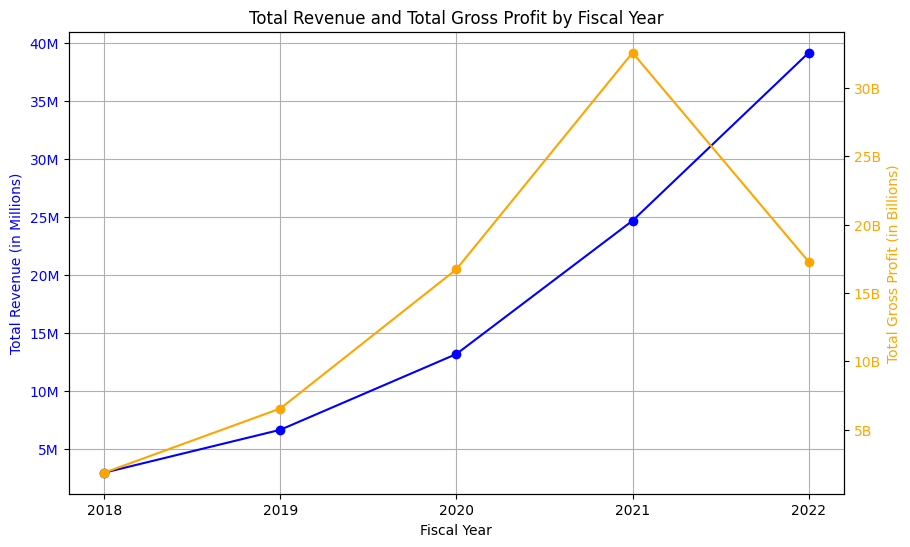

In [131]:
# plotting the results
fig, ax1 = plt.subplots(figsize=(10, 6))

# plot total revenue on the first y-axis
ax1.plot(aggregated_by_fiscal_year['fiscal_year'], aggregated_by_fiscal_year['total_revenue'], marker='o', color='blue', label='Total Revenue')
ax1.set_xlabel('Fiscal Year')
ax1.set_ylabel('Total Revenue (in Millions)', color='blue')

# format the y-axis to show amounts in millions with commas
formatter = ticker.FuncFormatter(lambda x, pos: f'{x*1e-6:,.0f}M')
ax1.yaxis.set_major_formatter(formatter)
ax1.tick_params(axis='y', labelcolor='blue')

# create a second y-axis for the total gross profit
ax2 = ax1.twinx() 
ax2.plot(aggregated_by_fiscal_year['fiscal_year'], aggregated_by_fiscal_year['total_gross_profit'], marker='o', color='orange', label='Total Gross Profit')
ax2.set_ylabel('Total Gross Profit (in Billions)', color='orange')

# format the y-axis to show amounts in billions with commas
formatter2 = ticker.FuncFormatter(lambda x, pos: f'{x*1e-9:,.0f}B')
ax2.yaxis.set_major_formatter(formatter2)
ax2.tick_params(axis='y', labelcolor='orange')
plt.xticks(aggregated_by_fiscal_year['fiscal_year'])

plt.title('Total Revenue and Total Gross Profit by Fiscal Year')
ax1.grid(True)
plt.show()

#### Aggregate the data by Market.

In [132]:
query_market = """
WITH gross_profit_calculation AS (
    SELECT 
        dc.market,
        fsm.product_code,
        fsm.customer_code,
        fsm.sold_quantity,
        fgp.gross_price,
        fmc.manufacturing_cost,
        (fgp.gross_price - fmc.manufacturing_cost) AS gross_profit_per_unit,
        (fsm.sold_quantity * (fgp.gross_price - fmc.manufacturing_cost)) AS gross_profit
    FROM 
        fact_sales_monthly fsm
    INNER JOIN 
        fact_gross_price fgp ON fsm.product_code = fgp.product_code AND fsm.fiscal_year = fgp.fiscal_year
    INNER JOIN 
        fact_manufacturing_cost fmc ON fsm.product_code = fmc.product_code AND fsm.fiscal_year = fmc.cost_year
    INNER JOIN 
        dim_customer dc ON fsm.customer_code = dc.customer_code
),
total_revenue AS (
    SELECT 
        dc.market,
        SUM(fsm.sold_quantity * fgp.gross_price) AS total_revenue
    FROM 
        fact_sales_monthly fsm
    JOIN 
        fact_gross_price fgp ON fsm.product_code = fgp.product_code AND fsm.fiscal_year = fgp.fiscal_year
    JOIN 
        dim_customer dc ON fsm.customer_code = dc.customer_code
    GROUP BY 
        dc.market
),
total_sales_volume AS (
    SELECT 
        dc.market,
        SUM(fsm.sold_quantity) AS total_sales_volume
    FROM 
        fact_sales_monthly fsm
    JOIN 
        dim_customer dc ON fsm.customer_code = dc.customer_code
    GROUP BY 
        dc.market
),
cost_per_unit_calculation AS (
    SELECT
        dc.market,
        AVG(fmc.manufacturing_cost) AS cost_per_unit
    FROM
        fact_sales_monthly fsm
    INNER JOIN
        fact_manufacturing_cost fmc ON fsm.product_code = fmc.product_code AND fsm.fiscal_year = fmc.cost_year
    INNER JOIN 
        dim_customer dc ON fsm.customer_code = dc.customer_code
    GROUP BY
        dc.market
),
aggregated_data AS (
    SELECT 
        gp.market,
        SUM(gp.gross_profit) AS total_gross_profit,
        (SUM(gp.gross_profit) / SUM(fsm.sold_quantity * fgp.gross_price)) * 100 AS profit_margin
    FROM 
        gross_profit_calculation gp
    INNER JOIN 
        fact_sales_monthly fsm ON gp.product_code = fsm.product_code AND gp.customer_code = fsm.customer_code
    INNER JOIN 
        fact_gross_price fgp ON gp.product_code = fgp.product_code AND fsm.fiscal_year = fgp.fiscal_year
    GROUP BY 
        gp.market
)
SELECT 
    ad.market,
    ad.total_gross_profit,
    ad.profit_margin,
    tr.total_revenue,
    tsv.total_sales_volume,
    cp.cost_per_unit
FROM 
    aggregated_data ad
INNER JOIN 
    total_revenue tr ON ad.market = tr.market
INNER JOIN 
    total_sales_volume tsv ON ad.market = tsv.market
INNER JOIN
    cost_per_unit_calculation cp ON ad.market = cp.market
ORDER BY 
    ad.market;
"""
aggregated_by_market = pd.read_sql_query(query_market, con)
aggregated_by_market

,market,total_gross_profit,profit_margin,total_revenue,total_sales_volume,cost_per_unit
0,Australia,6.320179e+07,70.301788,3.192199e+06,141088,6.039846
1,Austria,3.443526e+06,70.293106,3.165553e+05,12974,6.772664
2,Bangladesh,1.573540e+07,70.322413,9.202568e+05,39487,6.210698
3,Brazil,4.065350e+06,70.280184,1.945935e+05,9277,6.040925
4,Canada,8.938911e+07,70.293721,4.543901e+06,197068,6.041269
5,Chile,7.739266e+05,70.291109,6.526808e+04,2715,6.708196
6,China,4.868727e+07,70.335607,2.532771e+06,107637,6.041905
7,Columbia,1.927218e+05,70.400695,1.849502e+04,759,6.783684
8,France,6.697413e+07,70.292285,3.367269e+06,147853,6.039973
9,Germany,3.532801e+07,70.326425,2.015373e+06,88915,6.190767


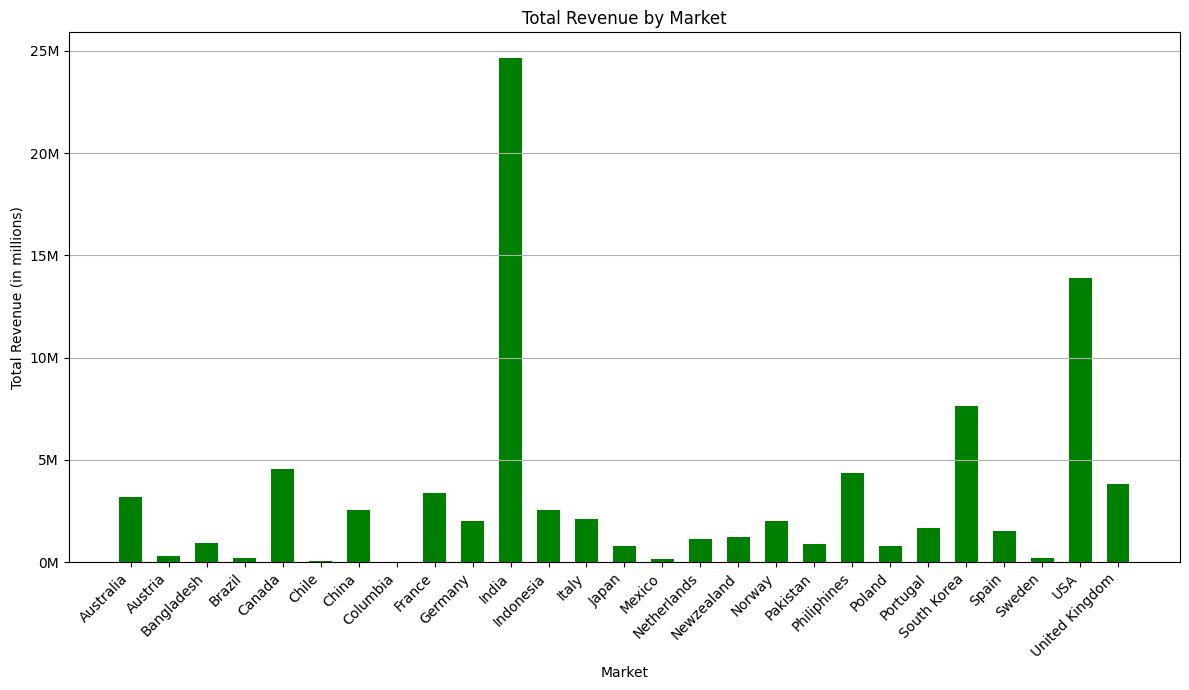

In [138]:
markets = aggregated_by_market['market']
revenue = aggregated_by_market['total_revenue']

# set up the bar width and positions
index = np.arange(len(markets))

# plot the bars
fig, ax = plt.subplots(figsize=(12, 7))

# revenue bars
bar1 = ax.bar(index, revenue, color='green', width=0.6)

# labels and title
ax.set_xlabel('Market')
ax.set_ylabel('Total Revenue (in millions)')
ax.set_title('Total Revenue by Market')
ax.set_xticks(index)
ax.set_xticklabels(markets, rotation=45, ha='right')

# format y-axis to show values in millions
formatter = plt.FuncFormatter(lambda x, pos: f'{x*1e-6:,.0f}M')
ax.yaxis.set_major_formatter(formatter)

# add a grid for better readability
ax.grid(True, axis='y')

plt.tight_layout()
plt.show()

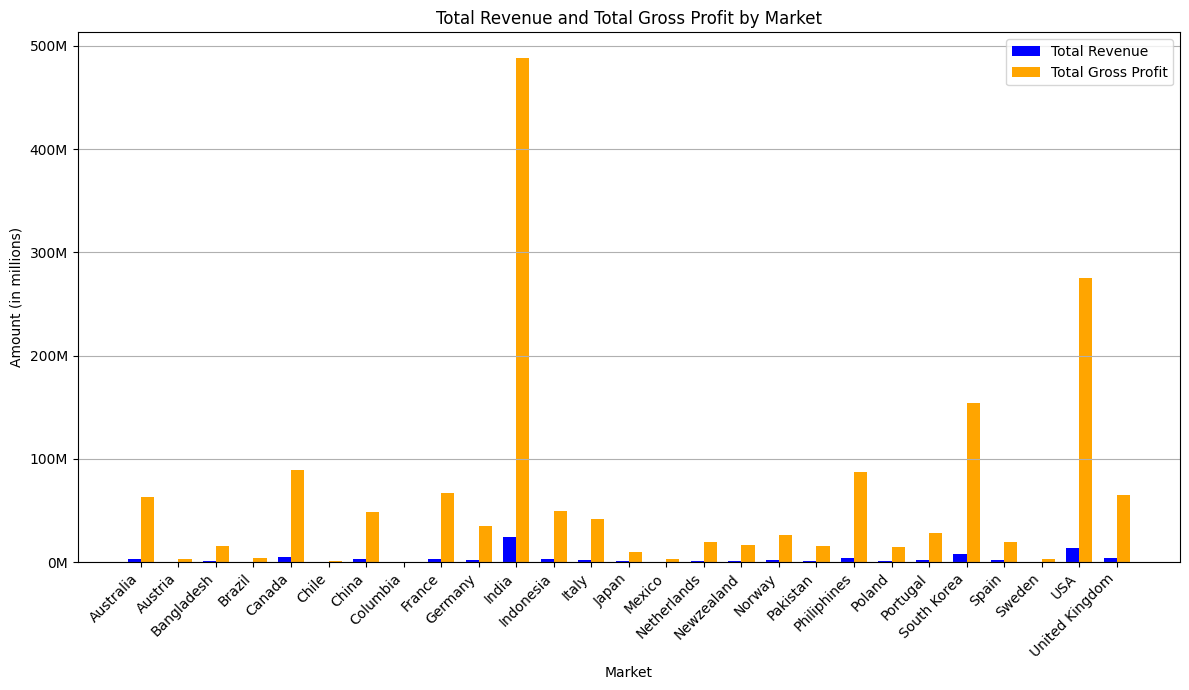

In [136]:
markets = aggregated_by_market['market']
revenue = aggregated_by_market['total_revenue']
profit = aggregated_by_market['total_gross_profit']

# set up the bar width and positions
bar_width = 0.35
index = np.arange(len(markets))

# plot the bars
fig, ax = plt.subplots(figsize=(12, 7))

# revenue bars
bar1 = ax.bar(index, revenue, bar_width, label='Total Revenue', color='blue')

# profit bars
bar2 = ax.bar(index + bar_width, profit, bar_width, label='Total Gross Profit', color='orange')

# labels and Title
ax.set_xlabel('Market')
ax.set_ylabel('Amount (in millions)')
ax.set_title('Total Revenue and Total Gross Profit by Market')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(markets, rotation=45, ha='right')

# format y-axis to show values in millions
formatter = ticker.FuncFormatter(lambda x, pos: f'{x*1e-6:,.0f}M')
ax.yaxis.set_major_formatter(formatter)

ax.legend()
ax.grid(True, axis='y')

plt.tight_layout()
plt.show()

#### Aggregate the data by Platform.

In [133]:
# query to aggregate data by platform
query_platform = """
WITH gross_profit_calculation AS (
    SELECT 
        dc.platform,
        fsm.product_code,
        fsm.customer_code,
        fsm.sold_quantity,
        fgp.gross_price,
        fmc.manufacturing_cost,
        (fgp.gross_price - fmc.manufacturing_cost) AS gross_profit_per_unit,
        (fsm.sold_quantity * (fgp.gross_price - fmc.manufacturing_cost)) AS gross_profit
    FROM 
        fact_sales_monthly fsm
    INNER JOIN 
        fact_gross_price fgp ON fsm.product_code = fgp.product_code AND fsm.fiscal_year = fgp.fiscal_year
    INNER JOIN 
        fact_manufacturing_cost fmc ON fsm.product_code = fmc.product_code AND fsm.fiscal_year = fmc.cost_year
    INNER JOIN 
        dim_customer dc ON fsm.customer_code = dc.customer_code
),
total_revenue AS (
    SELECT 
        dc.platform,
        SUM(fsm.sold_quantity * fgp.gross_price) AS total_revenue
    FROM 
        fact_sales_monthly fsm
    JOIN 
        fact_gross_price fgp ON fsm.product_code = fgp.product_code AND fsm.fiscal_year = fgp.fiscal_year
    JOIN 
        dim_customer dc ON fsm.customer_code = dc.customer_code
    GROUP BY 
        dc.platform
),
total_sales_volume AS (
    SELECT 
        dc.platform,
        SUM(fsm.sold_quantity) AS total_sales_volume
    FROM 
        fact_sales_monthly fsm
    JOIN 
        dim_customer dc ON fsm.customer_code = dc.customer_code
    GROUP BY 
        dc.platform
),
cost_per_unit_calculation AS (
    SELECT
        dc.platform,
        AVG(fmc.manufacturing_cost) AS cost_per_unit
    FROM
        fact_sales_monthly fsm
    INNER JOIN
        fact_manufacturing_cost fmc ON fsm.product_code = fmc.product_code AND fsm.fiscal_year = fmc.cost_year
    INNER JOIN 
        dim_customer dc ON fsm.customer_code = dc.customer_code
    GROUP BY
        dc.platform
),
aggregated_data AS (
    SELECT 
        gp.platform,
        SUM(gp.gross_profit) AS total_gross_profit,
        (SUM(gp.gross_profit) / SUM(fsm.sold_quantity * fgp.gross_price)) * 100 AS profit_margin
    FROM 
        gross_profit_calculation gp
    INNER JOIN 
        fact_sales_monthly fsm ON gp.product_code = fsm.product_code AND gp.customer_code = fsm.customer_code
    INNER JOIN 
        fact_gross_price fgp ON gp.product_code = fgp.product_code AND fsm.fiscal_year = fgp.fiscal_year
    GROUP BY 
        gp.platform
)
SELECT 
    ad.platform,
    ad.total_gross_profit,
    ad.profit_margin,
    tr.total_revenue,
    tsv.total_sales_volume,
    cp.cost_per_unit
FROM 
    aggregated_data ad
INNER JOIN 
    total_revenue tr ON ad.platform = tr.platform
INNER JOIN 
    total_sales_volume tsv ON ad.platform = tsv.platform
INNER JOIN
    cost_per_unit_calculation cp ON ad.platform = cp.platform
ORDER BY 
    ad.platform;
"""
aggregated_by_platform = pd.read_sql_query(query_platform, con)
aggregated_by_platform.head()

,platform,total_gross_profit,profit_margin,total_revenue,total_sales_volume,cost_per_unit
0,Brick & Mortar,1.155682e+09,70.309333,6.096251e+07,2657627,6.190947
1,E-Commerce,4.874514e+08,70.311965,2.559340e+07,1125308,6.177413


#### Aggregate the data by Channel.

In [134]:
# query to aggregate data by channel
query_channel = """
WITH gross_profit_calculation AS (
    SELECT 
        dc.channel,
        fsm.product_code,
        fsm.customer_code,
        fsm.sold_quantity,
        fgp.gross_price,
        fmc.manufacturing_cost,
        (fgp.gross_price - fmc.manufacturing_cost) AS gross_profit_per_unit,
        (fsm.sold_quantity * (fgp.gross_price - fmc.manufacturing_cost)) AS gross_profit
    FROM 
        fact_sales_monthly fsm
    INNER JOIN 
        fact_gross_price fgp ON fsm.product_code = fgp.product_code AND fsm.fiscal_year = fgp.fiscal_year
    INNER JOIN 
        fact_manufacturing_cost fmc ON fsm.product_code = fmc.product_code AND fsm.fiscal_year = fmc.cost_year
    INNER JOIN 
        dim_customer dc ON fsm.customer_code = dc.customer_code
),
total_revenue AS (
    SELECT 
        dc.channel,
        SUM(fsm.sold_quantity * fgp.gross_price) AS total_revenue
    FROM 
        fact_sales_monthly fsm
    JOIN 
        fact_gross_price fgp ON fsm.product_code = fgp.product_code AND fsm.fiscal_year = fgp.fiscal_year
    JOIN 
        dim_customer dc ON fsm.customer_code = dc.customer_code
    GROUP BY 
        dc.channel
),
total_sales_volume AS (
    SELECT 
        dc.channel,
        SUM(fsm.sold_quantity) AS total_sales_volume
    FROM 
        fact_sales_monthly fsm
    JOIN 
        dim_customer dc ON fsm.customer_code = dc.customer_code
    GROUP BY 
        dc.channel
),
cost_per_unit_calculation AS (
    SELECT
        dc.channel,
        AVG(fmc.manufacturing_cost) AS cost_per_unit
    FROM
        fact_sales_monthly fsm
    INNER JOIN
        fact_manufacturing_cost fmc ON fsm.product_code = fmc.product_code AND fsm.fiscal_year = fmc.cost_year
    INNER JOIN 
        dim_customer dc ON fsm.customer_code = dc.customer_code
    GROUP BY
        dc.channel
),
aggregated_data AS (
    SELECT 
        gp.channel,
        SUM(gp.gross_profit) AS total_gross_profit,
        (SUM(gp.gross_profit) / SUM(fsm.sold_quantity * fgp.gross_price)) * 100 AS profit_margin
    FROM 
        gross_profit_calculation gp
    INNER JOIN 
        fact_sales_monthly fsm ON gp.product_code = fsm.product_code AND gp.customer_code = fsm.customer_code
    INNER JOIN 
        fact_gross_price fgp ON gp.product_code = fgp.product_code AND fsm.fiscal_year = fgp.fiscal_year
    GROUP BY 
        gp.channel
)
SELECT 
    ad.channel,
    ad.total_gross_profit,
    ad.profit_margin,
    tr.total_revenue,
    tsv.total_sales_volume,
    cp.cost_per_unit
FROM 
    aggregated_data ad
INNER JOIN 
    total_revenue tr ON ad.channel = tr.channel
INNER JOIN 
    total_sales_volume tsv ON ad.channel = tsv.channel
INNER JOIN
    cost_per_unit_calculation cp ON ad.channel = cp.channel
ORDER BY 
    ad.channel;
"""
aggregated_by_channel = pd.read_sql_query(query_channel, con)
aggregated_by_channel

,channel,total_gross_profit,profit_margin,total_revenue,total_sales_volume,cost_per_unit
0,Direct,2.614959e+08,70.303234,1.379113e+07,604891,6.167320
1,Distributor,2.006501e+08,70.318711,1.006215e+07,443286,6.040547
2,Retailer,1.180987e+09,70.310177,6.270263e+07,2734758,6.197497


#### Aggregate the data by Customer.

In [135]:
# query to aggregate data by customer
query_customer = """
WITH gross_profit_calculation AS (
    SELECT 
        fsm.customer_code,
        fsm.product_code,
        fsm.sold_quantity,
        fsm.fiscal_year,
        fgp.gross_price,
        fmc.manufacturing_cost,
        dc.market,
        (fgp.gross_price - fmc.manufacturing_cost) AS gross_profit_per_unit,
        (fsm.sold_quantity * (fgp.gross_price - fmc.manufacturing_cost)) AS gross_profit,
        (fsm.sold_quantity * fgp.gross_price) AS revenue
    FROM 
        fact_sales_monthly fsm
    INNER JOIN 
        fact_gross_price fgp ON fsm.product_code = fgp.product_code AND fsm.fiscal_year = fgp.fiscal_year
    INNER JOIN 
        fact_manufacturing_cost fmc ON fsm.product_code = fmc.product_code AND fsm.fiscal_year = fmc.cost_year
    INNER JOIN 
        dim_customer dc ON fsm.customer_code = dc.customer_code
),
discounts_customer AS (
    SELECT 
        fpd.customer_code,
        SUM((gp.gross_profit * (fpd.pre_invoice_discount_pct / 100))) AS total_discount
    FROM 
        gross_profit_calculation gp
    LEFT JOIN 
        fact_pre_discount fpd ON gp.customer_code = fpd.customer_code AND gp.fiscal_year = fpd.fiscal_year
    GROUP BY 
        fpd.customer_code
),
frequency_purchase_customer AS (
    SELECT 
        fsm.customer_code,
        COUNT(DISTINCT fsm.date) AS purchase_frequency
    FROM 
        fact_sales_monthly fsm
    GROUP BY 
        fsm.customer_code
),
cltv_customer AS (
    SELECT 
        gp.customer_code,
        SUM(gp.gross_profit) AS customer_lifetime_value
    FROM 
        gross_profit_calculation gp
    GROUP BY 
        gp.customer_code
),
market_segment_contribution AS (
    SELECT 
        gp.market,
        gp.customer_code,
        SUM(gp.revenue) AS market_contribution
    FROM 
        gross_profit_calculation gp
    GROUP BY 
        gp.market, gp.customer_code
),
churn_customer_segment AS (
    SELECT 
        fsm.customer_code,
        CASE 
            WHEN MAX(fsm.fiscal_year) < (SELECT MAX(fiscal_year) FROM fact_sales_monthly) THEN 1
            ELSE 0
        END AS churn_status
    FROM 
        fact_sales_monthly fsm
    GROUP BY 
        fsm.customer_code
)
SELECT 
    gp.customer_code,
    SUM(gp.revenue) AS revenue_per_customer,
    SUM(gp.gross_profit) AS gross_profit_per_customer,
    SUM(gp.sold_quantity) AS total_sales_volume_per_customer,
    cltv.customer_lifetime_value,
    dc.total_discount AS discounts_customer,
    fp.purchase_frequency AS frequency_purchase_customer,
    churn.churn_status AS churn_customer_segment,
    ms.market_contribution
FROM 
    gross_profit_calculation gp
LEFT JOIN 
    discounts_customer dc ON gp.customer_code = dc.customer_code
LEFT JOIN 
    frequency_purchase_customer fp ON gp.customer_code = fp.customer_code
LEFT JOIN 
    cltv_customer cltv ON gp.customer_code = cltv.customer_code
LEFT JOIN 
    churn_customer_segment churn ON gp.customer_code = churn.customer_code
LEFT JOIN 
    market_segment_contribution ms ON gp.customer_code = ms.customer_code
GROUP BY 
    gp.customer_code, cltv.customer_lifetime_value, dc.total_discount, fp.purchase_frequency, churn.churn_status, ms.market_contribution
ORDER BY 
    gp.customer_code;
"""
aggregated_customer = pd.read_sql_query(query_customer, con)
aggregated_customer.head(10)

,customer_code,revenue_per_customer,gross_profit_per_customer,total_sales_volume_per_customer,customer_lifetime_value,discounts_customer,frequency_purchase_customer,churn_customer_segment,market_contribution
0,70002017,1.205805e+06,847238.4964,53113,847238.4964,741.131098,39,0,1.205805e+06
1,70002018,1.386284e+06,974635.0415,61138,974635.0415,2489.502111,39,0,1.386284e+06
2,70003181,5.934382e+05,417671.6954,25998,417671.6954,315.693134,39,0,5.934382e+05
3,70003182,6.302344e+05,443607.1532,27323,443607.1532,915.161929,39,0,6.302344e+05
4,70004069,7.092248e+04,49872.5799,2993,49872.5799,45.477811,21,0,7.092248e+04
5,70004070,7.838817e+04,55082.6040,3362,55082.6040,126.574375,21,0,7.838817e+04
6,70005163,1.888071e+05,132728.2086,8323,132728.2086,354.985134,30,0,1.888071e+05
7,70006157,3.438517e+05,241837.2469,15258,241837.2469,176.758118,39,0,3.438517e+05
8,70006158,3.816029e+05,268303.5315,17015,268303.5315,600.418901,39,0,3.816029e+05
9,70007198,6.543170e+05,459989.9115,29101,459989.9115,370.765099,39,0,6.543170e+05


***

### 4. Exploratory Data Analysis (EDA)

#### Descriptive Statistics:<br>
- Calculate mean, median, and standard deviation for revenue, profit, and margin metrics.
- Identify outliers or unusual trends in the data.
#### Trend Analysis:<br>
- Plot revenue, profit, and margin over time to visualize trends.
- Use time series analysis to forecast future revenue and profit.
#### Segment Analysis:<br>
- Break down revenue and profit by platform, market, region, and category.
- Identify which segments contribute most to overall profitability.
#### Correlation Analysis:<br>
- Analyze the relationship between different metrics (e.g., how does discount percentage affect net profit?).
- Look for correlations between market conditions and profitability.

***

### 5. Identifying Problems or Questions to Address

#### Profitability Issues:<br>
- Are certain markets or platforms less profitable? If so, why?
- Is there a declining trend in any key categories or segments?
#### Market Shifts:<br>
- Are there shifts in revenue from one platform to another (e.g., from Brick & Mortar to E-Commerce)?
- Are there emerging markets or declining markets based on the data?
#### Cost Efficiency:<br>
- Are manufacturing costs rising, and how does this affect profit margins?
- Are discounts eroding profitability in certain markets or for certain customers?

***

### 6. Research and Contextual Understanding

#### Industry Benchmarks:<br>
- Research industry standards for profit margins, cost structures, and market share to compare with your findings.
#### Economic Factors:<br>
- Consider external economic factors that may have influenced market trends (e.g., currency fluctuations, economic downturns).
#### Competitor Analysis:
- Research competitors' performance in similar markets to understand potential threats or opportunities.


***

### 7. Hypothesis Formation and Testing

#### Based on the EDA, form hypotheses about what drives revenue and profit. For example:<br>
- "E-Commerce platform is more profitable due to lower overhead costs."
- "The market in Japan has seen a decline due to increased competition."
#### Design experiments or statistical tests to validate these hypotheses.

***

### 8. Visualization and Reporting

#### Dashboards:<br>
- Create visualizations to represent the trends, comparisons, and insights derived from the data.
- Use tools like Power BI, Tableau, or Python libraries like Matplotlib/Seaborn.
#### Report:<br>
- Compile a report summarizing your findings, insights, and recommendations based on the analysis.
- Ensure that the report answers the key questions posed at the beginning of the project.

***

### 9. Actionable Recommendations

#### Based on the analysis, provide recommendations for business strategies to improve revenue, optimize profits, and adapt to market shifts. These could include:<br>
- Focusing more on profitable platforms or markets.
- Reducing costs in certain product lines.
- Increasing marketing efforts in emerging markets or declining segments.